In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import requests
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.model_selection import train_test_split

In [2]:
# Membaca stopwords dari file CSV
stopwords_df = pd.read_csv('bahasa.csv', header=None)
stop_words = set(stopwords_df[0].str.strip())  # Menghapus spasi di sekitar kata

In [64]:
np.random.seed(350)

Corpus = pd.read_csv(
    r"UAS.csv", encoding='latin-1')

In [65]:
# Step - a : Remove blank rows if any. (Optional if your data already doesn't have blank rows)
Corpus.dropna(subset=['text'], inplace=True)

# Step - b : Change all the text to lower case.
Corpus['text'] = Corpus['text'].str.lower()

# Define stop words and tag_map
stop_words = set(stopwords.words("indonesian"))  # Make sure you have the Indonesian stopwords downloaded
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

def preprocess_text(text):
    final_words = []
    word_Lemmatized = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for word, tag in pos_tag(tokens):
        if word not in stop_words and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word, tag_map[tag[0]])
            final_words.append(word_Final)
    return ' '.join(final_words)

Corpus['text_final'] = Corpus['text'].apply(preprocess_text)

print(Corpus[['text', 'text_final']])

                                                  text  \
0    samsung galaxy z fold  akan diluncurkan sebent...   
1    bocoran iphone  pro kian menyeruak smartphone ...   
2    usaha kecil dan menengah  ukm  adalah pilar pe...   
3     lenovo membuka preorder untuk laptop terbarun...   
4     nama rumsyah baduy viral setelah konten dari ...   
..                                                 ...   
297    youtuber asal korea selatan hari jisun mengu...   
298    setelah naik haji lewat jalur influencer kin...   
299    sorot atensi publik terhadap sosok fuji saya...   
300   cara numbuhin rambut cepat seperti apa yang b...   
301    risty tagor termasuk salah satu influencer y...   

                                            text_final  
0    samsung galaxy z fold diluncurkan sebentar boc...  
1    bocoran iphone pro kian menyeruak smartphone t...  
2    usaha menengah ukm pilar perekonomian indonesi...  
3    lenovo membuka preorder laptop terbarunya leno...  
4    nama rumsyah 

In [66]:
Corpus['text_final']

0      samsung galaxy z fold diluncurkan sebentar boc...
1      bocoran iphone pro kian menyeruak smartphone t...
2      usaha menengah ukm pilar perekonomian indonesi...
3      lenovo membuka preorder laptop terbarunya leno...
4      nama rumsyah baduy viral konten tiktoker tenar...
                             ...                        
297    youtuber korea selatan jisun mengunggah video ...
298    haji jalur influencer muncul fenomena universi...
299    sorot atensi publik sosok fuji sayangnya berte...
300    numbuhin rambut cepat diterapkan mengalami keb...
301    risty tagor salah influencer diundang pergi ha...
Name: text_final, Length: 302, dtype: object

In [67]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'], Corpus['category'], test_size=0.3)

In [68]:
Test_X

109    sate sapi sepopuler sate ayam sate kambing mem...
24     seiring perilisannya kian bocoran spesifikasi ...
16     apple developer academy meluncurkan kurikulum ...
15     apple memeperkenalkan sistem io acara worldwid...
243    sate daging sapi salah hidangan populer indone...
                             ...                        
64     iklan hp android elemen muncul aplikasi browse...
92     tongseng kambing salah hidangan populer indone...
36     liputancom jakarta samsung menggelar event gal...
53     youtube perang penyedia pemblokir iklan adbloc...
61     kehilangan hp pengalaman menyebalkan perangkat...
Name: text_final, Length: 91, dtype: object

In [69]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [70]:
Test_Y

array([0, 3, 3, 3, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 1, 3,
       3, 0, 0, 2, 2, 0, 0, 2, 3, 3, 2, 0, 3, 3, 3, 2, 0, 3, 3, 0, 3, 0,
       2, 2, 1, 3, 3, 0, 3, 2, 3, 3, 0, 3, 3, 2, 3, 1, 0, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 3, 3, 3, 0, 0, 3, 2, 3, 2, 0, 3, 2, 3, 0, 0, 2, 0, 0,
       3, 3, 0])

In [71]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

print(Tfidf_vect.vocabulary_)

{'samsung': 4075, 'galaxy': 1292, 'fold': 1262, 'diluncurkan': 976, 'sebentar': 4119, 'bocoran': 592, 'spesifikasi': 4346, 'hp': 1478, 'beredar': 432, 'berita': 460, 'terbaru': 4543, 'diharapkan': 927, 'pengguna': 3525, 'membeli': 2510, 'dirumorkan': 1045, 'membawa': 2503, 'perubahan': 3706, 'signifikan': 4257, 'diusung': 1103, 'berbeda': 419, 'ponsel': 3780, 'memiliki': 2548, 'banderol': 328, 'harga': 1430, 'pendahulu': 3462, 'baca': 288, 'flip': 1258, 'layar': 2186, 'kamera': 1736, 'lokasi': 2274, 'jadwal': 1619, 'unpack': 4802, 'terkuak': 4585, 'debut': 796, 'desain': 814, 'fe': 1234, 'bezel': 544, 'tebal': 4496, 'watch': 4899, 'resmi': 3975, 'meluncur': 2462, 'smartwatch': 4315, 'anyar': 199, 'terjangkau': 4576, 'top': 4673, 'tekno': 4506, 'iphone': 1590, 'pro': 3834, 'update': 4809, 'one': 3207, 'ui': 4757, 'mendarat': 2635, 'diperkuat': 1016, 'snapdragon': 4319, 'gen': 1323, 'pakai': 3264, 'exynos': 1218, 'membahas': 2491, 'kenaikan': 1876, 'simak': 4263, 'spesifikasinya': 4347, 

In [74]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf, Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",
      accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  89.01098901098901


<Axes: >

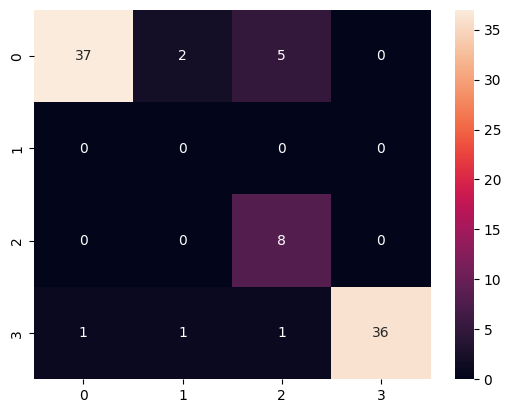

In [75]:
cf_matrix = confusion_matrix(predictions_NB, Test_Y)
sns.heatmap(cf_matrix, annot=True)

In [78]:
# # Menghitung metrik untuk Naive Bayes
predictions_NB_proba = Naive.predict_proba(Test_X_Tfidf)

# # Menghitung Recall, Precision, F1-Score dan Accuracy
recall = recall_score(Test_Y, predictions_NB, average=None)  # Menghitung recall untuk setiap kelas
precision = precision_score(Test_Y, predictions_NB, average=None)  # Menghitung precision untuk setiap kelas
f1 = f1_score(Test_Y, predictions_NB, average=None)  # Menghitung F1-score untuk setiap kelas
accuracy = accuracy_score(Test_Y, predictions_NB)  # Menghitung accuracy keseluruhan

# # Menghitung AUC-ROC untuk setiap kelas
roc_auc = roc_auc_score(Test_Y, predictions_NB_proba, multi_class='ovr')

# Memilih satu kelas sebagai pos_label
pos_label = 0

# Contoh mencetak nilai Recall, Precision, dan F1-score untuk kelas dengan pos_label=0
print("\nMetrics for class with pos_label=0:")
print("Accuracy:", round(accuracy*100, 1), "%")
print("Recall:", round(recall[pos_label] * 100, 1), "%")
print("Precision:", round(precision[pos_label] * 100, 1), "%")
print("F1-Score:", round(f1[pos_label] * 100, 1), "%")
print("AUC-ROC:", round(roc_auc * 100, 2), "%")


Metrics for class with pos_label=0:
Accuracy: 89.0 %
Recall: 97.4 %
Precision: 84.1 %
F1-Score: 90.2 %
AUC-ROC: 96.38 %


C:\Users\Nawaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
